# Student Number: 190526948

In [1]:
#Please download the files 2004.csv, 2005.csv, airports.csv, carriers.csv, and plane-data.csv from https://doi.org/10.7910/DVN/HG7NV7
#Ensure that you have set your working directory to the location where the files are downloaded.

# Q5 Use the available variables to construct a model that predicts delays.

In [2]:
import sqlite3
import pandas as pd
import os

In [3]:
# IMPORTANT NOTE
# Note that your path to the database may be different
try:
    os.remove('F:/School/Year_3/ST2195/Course_Work/Data/airline2_python.db')
except OSError:
    pass


In [5]:
# Note that your path to the database may be different 
conn = sqlite3.connect('F:/School/Year_3/ST2195/Course_Work/Data/airline2_python.db')
# Note that your path to the data may be different 
airports = pd.read_csv("F:/School/Year_3/ST2195/Course_Work/Data/airports.csv")
carriers = pd.read_csv("F:/School/Year_3/ST2195/Course_Work/Data/carriers.csv")
planes = pd.read_csv("F:/School/Year_3/ST2195/Course_Work/Data/plane-data.csv")

airports.to_sql('airports', con = conn, index = False)
carriers.to_sql('carriers', con = conn, index = False)
planes.to_sql('planes', con = conn, index = False)

c = conn.cursor()

ValueError: Table 'airports' already exists.

In [ ]:
c.execute('''
CREATE TABLE ontime (
  Year int,
  Month int,
  DayofMonth int,
  DayOfWeek int,
  DepTime  int,
  CRSDepTime int,
  ArrTime int,
  CRSArrTime int,
  UniqueCarrier varchar(5),
  FlightNum int,
  TailNum varchar(8),
  ActualElapsedTime int,
  CRSElapsedTime int,
  AirTime int,
  ArrDelay int,
  DepDelay int,
  Origin varchar(3),
  Dest varchar(3),
  Distance int,
  TaxiIn int,
  TaxiOut int,
  Cancelled int,
  CancellationCode varchar(1),
  Diverted varchar(1),
  CarrierDelay int,
  WeatherDelay int,
  NASDelay int,
  SecurityDelay int,
  LateAircraftDelay int
)
''')

conn.commit()

In [ ]:
for year in range(2004, 2006):
    print('Processing: ', year)
    ontime = pd.read_csv("F:/School/Year_3/ST2195/Course_Work/Data/"+str(year)+".csv")    
    ontime.to_sql('ontime', con = conn, if_exists = 'append', index = False)

conn.commit()

In [6]:
ontime_db = pd.read_sql('SELECT * FROM ontime', conn)

In [7]:
import numpy as np
ontime_db.shape
ontime_db.isnull().sum()
ontime_db.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                261487
CRSDepTime                  0
ArrTime                289299
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                   127
ActualElapsedTime      289299
CRSElapsedTime              0
AirTime                289299
ArrDelay               289299
DepDelay               261487
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14008371
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [8]:
ontime_db_2004 = ontime_db.copy()
ontime_db_2004 = ontime_db_2004[ontime_db_2004['Year'] != 2005]
ontime_db_2004 = ontime_db_2004[ontime_db['Month']==1]
ontime_db_2004 = ontime_db[ontime_db['Cancelled'] != 1]
ontime_db_2004['Delay'] = np.where(ontime_db_2004['DepDelay'] >=15, 1, 0 )
ontime_db_2004_10 = (ontime_db_2004.Origin.value_counts()).head(10)
ontime_db_2004 = ontime_db_2004[ontime_db_2004['Origin'].isin(['ORD','ATL','DFW','LAX','CVG','IAH','PHX','LAS','DEN','EWR'])]

<ipython-input-8-b427e5fe1a05>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ontime_db_2004 = ontime_db_2004[ontime_db['Month']==1]
<ipython-input-8-b427e5fe1a05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontime_db_2004['Delay'] = np.where(ontime_db_2004['DepDelay'] >=15, 1, 0 )


In [9]:
features = ontime_db_2004[['Delay','Month', 'DayOfWeek', 'DayofMonth', 'Origin', 'CRSDepTime','CarrierDelay', 'WeatherDelay',
                           'NASDelay', 'SecurityDelay','LateAircraftDelay']]

In [10]:
corrMatrix = features.corr()
print (corrMatrix)
features = pd.get_dummies(features, columns=['Origin'])
features.head()

                      Delay     Month  DayOfWeek  DayofMonth  CRSDepTime  \
Delay              1.000000  0.010610  -0.001378    0.023247    0.178854   
Month              0.010610  1.000000  -0.003906    0.008384   -0.005435   
DayOfWeek         -0.001378 -0.003906   1.000000   -0.004110    0.004175   
DayofMonth         0.023247  0.008384  -0.004110    1.000000   -0.001143   
CRSDepTime         0.178854 -0.005435   0.004175   -0.001143    1.000000   
CarrierDelay       0.392349  0.006101   0.005907    0.008421    0.047467   
WeatherDelay       0.192272 -0.000796  -0.007404    0.008350    0.055304   
NASDelay           0.206102 -0.006109  -0.022660    0.010317    0.034560   
SecurityDelay      0.033144  0.001230   0.005975    0.002234    0.000165   
LateAircraftDelay  0.439457  0.002995  -0.010935    0.011963    0.137995   

                   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
Delay                  0.392349      0.192272  0.206102       0.033144   
Month          

,Delay,Month,DayOfWeek,DayofMonth,CRSDepTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin_ATL,Origin_CVG,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_LAS,Origin_LAX,Origin_ORD,Origin_PHX
0,0,1,1,12,630,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,2,13,630,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,3,14,630,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,4,15,630,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,5,16,630,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features.drop('Delay', axis=1),
                                                    features['Delay'], test_size=0.3, random_state=42)

In [12]:
len(test_x)
train_x.shape
test_x.shape

(1423468, 19)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13, n_estimators=100)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.9440226264306609

In [14]:
probabilities = model.predict_proba(test_x)
probabilities

array([[0.        , 1.        ],
       [0.82      , 0.18      ],
       [0.89395238, 0.10604762],
       ...,
       [0.82317857, 0.17682143],
       [1.        , 0.        ],
       [0.9875    , 0.0125    ]])

In [15]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(test_x)
cm = confusion_matrix(test_y, y_predicted)
cm

array([[1119996,   25956],
       [  53726,  223790]], dtype=int64)

Text(69.0, 0.5, 'truth')

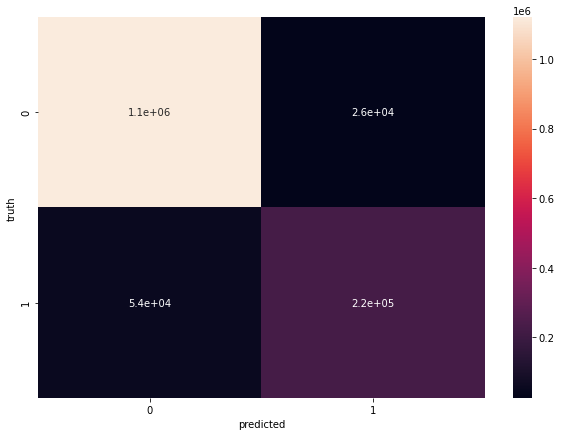

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [17]:
from sklearn.metrics import precision_score
train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9921810768637057

In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(train_y, train_x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.183768
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Delay   No. Observations:              3321424
Model:                          Logit   Df Residuals:                  3321405
Method:                           MLE   Df Model:                           18
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.6272
Time:                        04:34:48   Log-Likelihood:            -6.1037e+05
converged:                       True   LL-Null:                   -1.6373e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Month                 0.0116      0.001     15.722      0.000       0.010       0.013
DayOfWe

In [19]:
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.9144499892523169

In [20]:
probs = model.predict_proba(test_x)
preds = probs[:,1]

In [21]:
from sklearn import metrics
from sklearn.metrics import precision_score
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc_arr = metrics.auc(fpr, tpr)

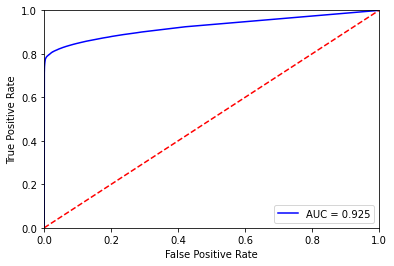

In [22]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc_arr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()